
## <p style="background-color:#FF8C00; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Imports </p>

In [993]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns
import plotly.graph_objects as go


In [994]:
# loading data from the csv file that which we took in the end of the data visualization.
df = pd.read_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\2-\\Churn_Prediction_Becode\\1_data storage\\BankChurners.csv')

In [995]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [996]:
df2 = df.copy()


## <p style="background-color:#FF8C00; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Cleaning </p>


### <p style="background-color:#BA55D3; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Inspecting Data </p>

In [997]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

We could see that in every Columns we don't have a non values. But to be sure we could check with IsNull ? 

In [998]:
# We are checking if there is any missing values ? 
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [999]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [1000]:
df.shape


(10127, 23)


### <p style="background-color:#BA55D3; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">EDA</p>

In [1001]:
# data vizualization with plotly

from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=4)

trace0 = go.Histogram(x=df['Attrition_Flag'],name="Exsisiting Customer or not")
trace1 = go.Histogram(x=df['Customer_Age'], name='Age')
trace2 = go.Histogram(x=df['Gender'], name='Sex')
trace3 = go.Histogram(x=df['Dependent_count'], name='Dependent Count')
trace4 = go.Histogram(x=df['Education_Level'], name='Education Level')
trace5 = go.Histogram(x=df['Marital_Status'], name='Marital Status')
trace6 = go.Histogram(x=df['Card_Category'], name='Type of Card')
trace7 = go.Histogram(x=df['Months_on_book'], name='period of relationsip with book')
trace8 = go.Histogram(x=df['Total_Relationship_Count'], name='number of products held')
trace9 = go.Histogram(x=df['Months_Inactive_12_mon'], name='monthe incactive')
trace10 = go.Histogram(x=df['Contacts_Count_12_mon'], name='number of contacts')
trace11 = go.Histogram(x=df['Income_Category'], name='Income Category')
trace12 = go.Histogram(x=df['Credit_Limit'], name='Credit Limit')
trace13 = go.Histogram(x=df['Total_Revolving_Bal'], name='Revolving Balance')
trace14 = go.Histogram(x=df['Avg_Open_To_Buy'], name='Open to Buy Credit Line')
trace15 = go.Histogram(x=df['Total_Amt_Chng_Q4_Q1'], name='Change in Transaction Amount')
trace16 = go.Histogram(x=df['Total_Trans_Amt'], name='Transaction amount')
trace17 = go.Histogram(x=df['Total_Trans_Ct'], name='Transaction Count')
trace18 = go.Histogram(x=df['Total_Ct_Chng_Q4_Q1'], name='change in transaction count')
trace19 = go.Histogram(x=df['Avg_Utilization_Ratio'], name='Card Utilization Ratio')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 4)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 2, 4)
fig.append_trace(trace8, 3, 1)
fig.append_trace(trace9, 3, 2)
fig.append_trace(trace10, 3, 3)
fig.append_trace(trace11, 3, 4)
fig.append_trace(trace12, 4, 1)
fig.append_trace(trace13, 4, 2)
fig.append_trace(trace14, 4, 3)
fig.append_trace(trace15, 4, 4)
fig.append_trace(trace16, 5, 1)
fig.append_trace(trace17, 5, 2)
fig.append_trace(trace18, 5, 3)
fig.append_trace(trace19, 5, 4)

fig.update_layout(
    autosize=False,
    width=2000,
    height=1600
)

fig.show()

#### CLIENTNUM

In [1002]:
df.rename(columns={"CLIENTNUM": "Client_Num",}, inplace=True)
df.sample(3)

Client_Num     Attrition_Flag  Customer_Age Gender  Dependent_count  \
7738   778378983  Attrited Customer            54      F                1   
105    716657058  Existing Customer            43      F                4   
3691   787770858  Existing Customer            43      M                4   

     Education_Level Marital_Status Income_Category Card_Category  \
7738        Graduate         Single  Less than $40K          Blue   
105    Post-Graduate        Married  Less than $40K          Blue   
3691        Graduate         Single    $80K - $120K          Blue   

      Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
7738              34  ...        2939.0                 2152            787.0   
105               33  ...        8358.0                  926           7432.0   
3691              32  ...        8333.0                  774           7559.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7738                 0.555             2476              42   
105                  0.762             1566              37   
3691                 0.984             3889              81   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
7738                0.355                  0.732   
105                 0.542                  0.111   
3691                0.723                  0.093   

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
7738                                           0.990730                                                                                    
105                                            0.000373                                                                                    
3691                                           0.000201                                                                                    

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
7738                                            0.00927                                                                                   
105                                             0.99963                                                                                   
3691                                            0.99980                                                                                   

[3 rows x 23 columns]

#### GENDER

In [1003]:
df['Gender'].value_counts()


F    5358
M    4769
Name: Gender, dtype: int64

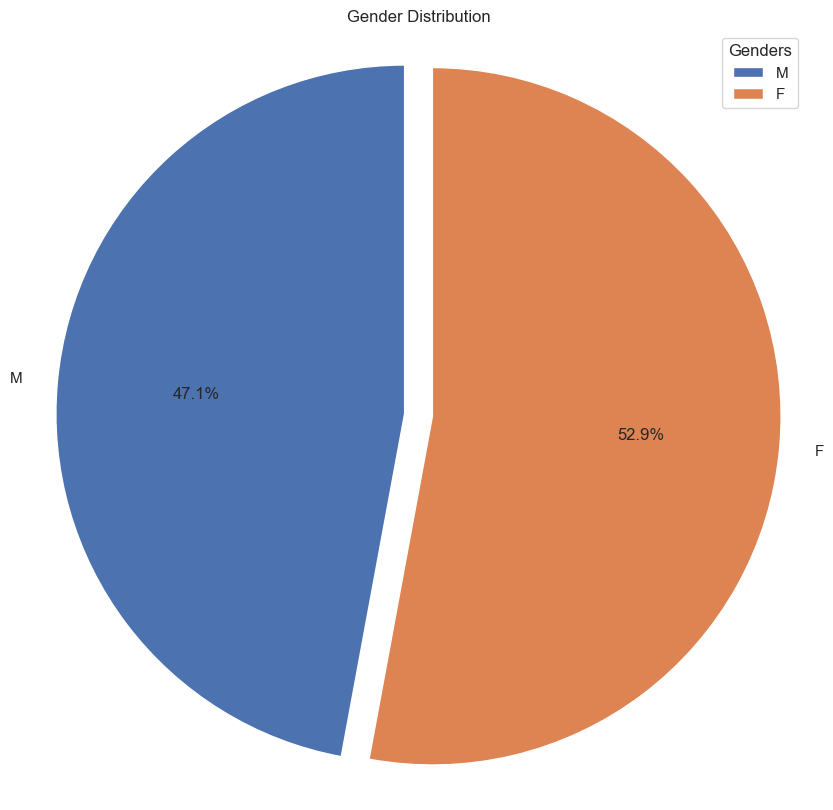

In [1004]:
labels = df['Gender'].unique()
sizes = [df['Gender'].value_counts()[1], df['Gender'].value_counts()[0]]
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, explode=(0.08, 0), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.legend(title='Genders', loc='best')
plt.show()


In [1005]:
df.groupby('Card_Category')['Gender'].value_counts()


Card_Category  Gender
Blue           F         5101
               M         4335
Gold           M           78
               F           38
Platinum       M           11
               F            9
Silver         M          345
               F          210
Name: Gender, dtype: int64

#### AGE

In [1006]:
df.groupby('Gender')['Customer_Age'].agg(['mean','count'])


mean  count
Gender                  
F       46.456887   5358
M       46.178863   4769

C:\Users\pc\AppData\Local\Temp\ipykernel_11796\1890326294.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Age mean :  46.32596030413745
Age median :  46.0


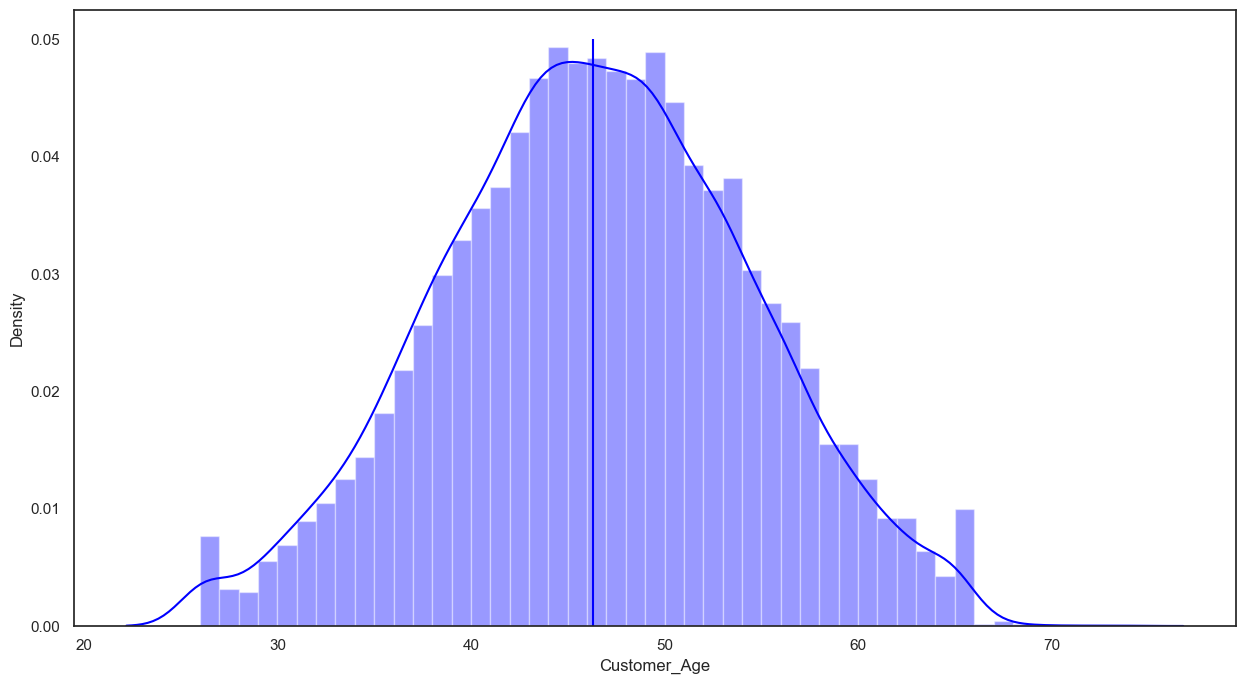

In [1007]:
plt.figure(figsize=(15,8))
sns.distplot(df['Customer_Age'], color = 'blue')
age_mean = df['Customer_Age'].mean()
plt.vlines(age_mean, 0, 0.05, color = 'blue')


print('Age mean : ', age_mean)
print('Age median : ', df['Customer_Age'].median())

#### INCOME 

In [1008]:
df.groupby('Income_Category')['Education_Level'].value_counts()


Income_Category  Education_Level
$120K +          Graduate            204
                 High School         147
                 Unknown             120
                 Uneducated          119
                 College              70
                 Doctorate            37
                 Post-Graduate        30
$40K - $60K      Graduate            553
                 High School         355
                 Unknown             269
                 Uneducated          249
                 College             183
                 Post-Graduate       111
                 Doctorate            70
$60K - $80K      Graduate            422
                 High School         307
                 Unknown             210
                 Uneducated          195
                 College             132
                 Post-Graduate        77
                 Doctorate            59
$80K - $120K     Graduate            478
                 High School         308
                 Unknown

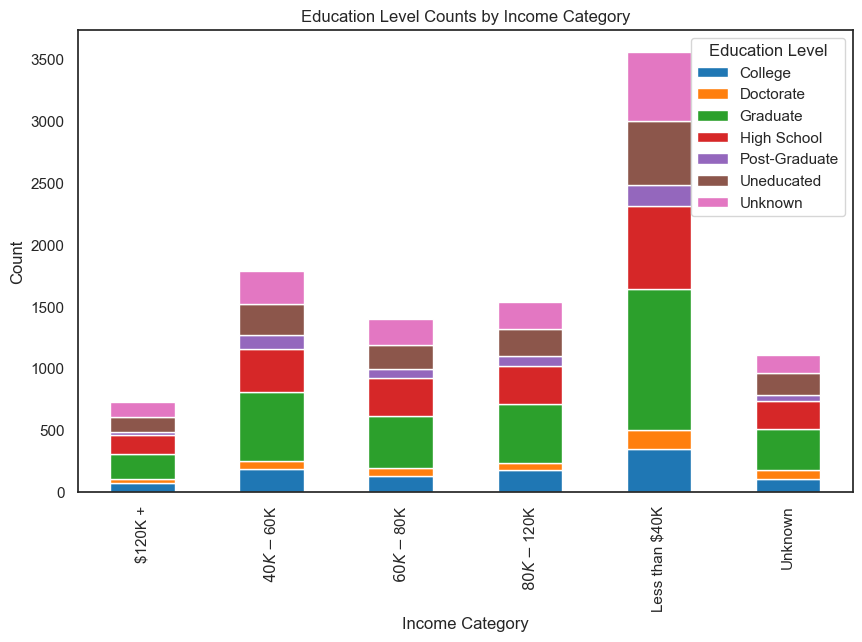

In [1009]:
data = df.groupby('Income_Category')['Education_Level'].value_counts().unstack()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#FF6B6B', '#FFC107', '#9C27B0', '#4CAF50']


ax = data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_xlabel('Income Category')
ax.set_ylabel('Count')
ax.set_title('Education Level Counts by Income Category')
ax.legend(title='Education Level', loc='upper right')

plt.show()



In [1010]:
df.columns

Index(['Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

#### Attrition_Flag

In [1011]:
df['Attrition_Flag'].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [1012]:
df.groupby("Gender").agg({"Credit_Limit":"mean", "Customer_Age":"mean","Attrition_Flag":"count"})


Credit_Limit  Customer_Age  Attrition_Flag
Gender                                            
F        5023.854274     46.456887            5358
M       12685.674963     46.178863            4769

In [1013]:
df.groupby(['Attrition_Flag',"Gender","Card_Category"]).agg({"Credit_Limit":"mean"})


Credit_Limit
Attrition_Flag    Gender Card_Category              
Attrited Customer F      Blue            3835.836742
                         Gold           22342.625000
                         Platinum       25251.500000
                         Silver         18063.250000
                  M      Blue           11036.984897
                         Gold           34516.000000
                         Platinum       23981.000000
                         Silver         30055.018519
Existing Customer F      Blue            4407.870933
                         Gold           20600.166667
                         Platinum       27104.400000
                         Silver         18699.598901
                  M      Blue           10946.283162
                         Gold           31551.461538
                         Platinum       34516.000000
                         Silver         29199.759450


### <p style="background-color:#BA55D3; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Data PreProccessing</p>

#### Dropping NonImportant Columns for a Corr

In [1014]:
df.head(7)

Client_Num     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   
5              36  ...        4010.0                 1247           2763.0   
6              46  ...       34516.0                 2264          32252.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   
5                  0.311   
6                  0.066   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    
5                                           0.000055                                                                                    
6                                           0.000123                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1            

C:\Users\pc\AppData\Local\Temp\ipykernel_11796\38485495.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



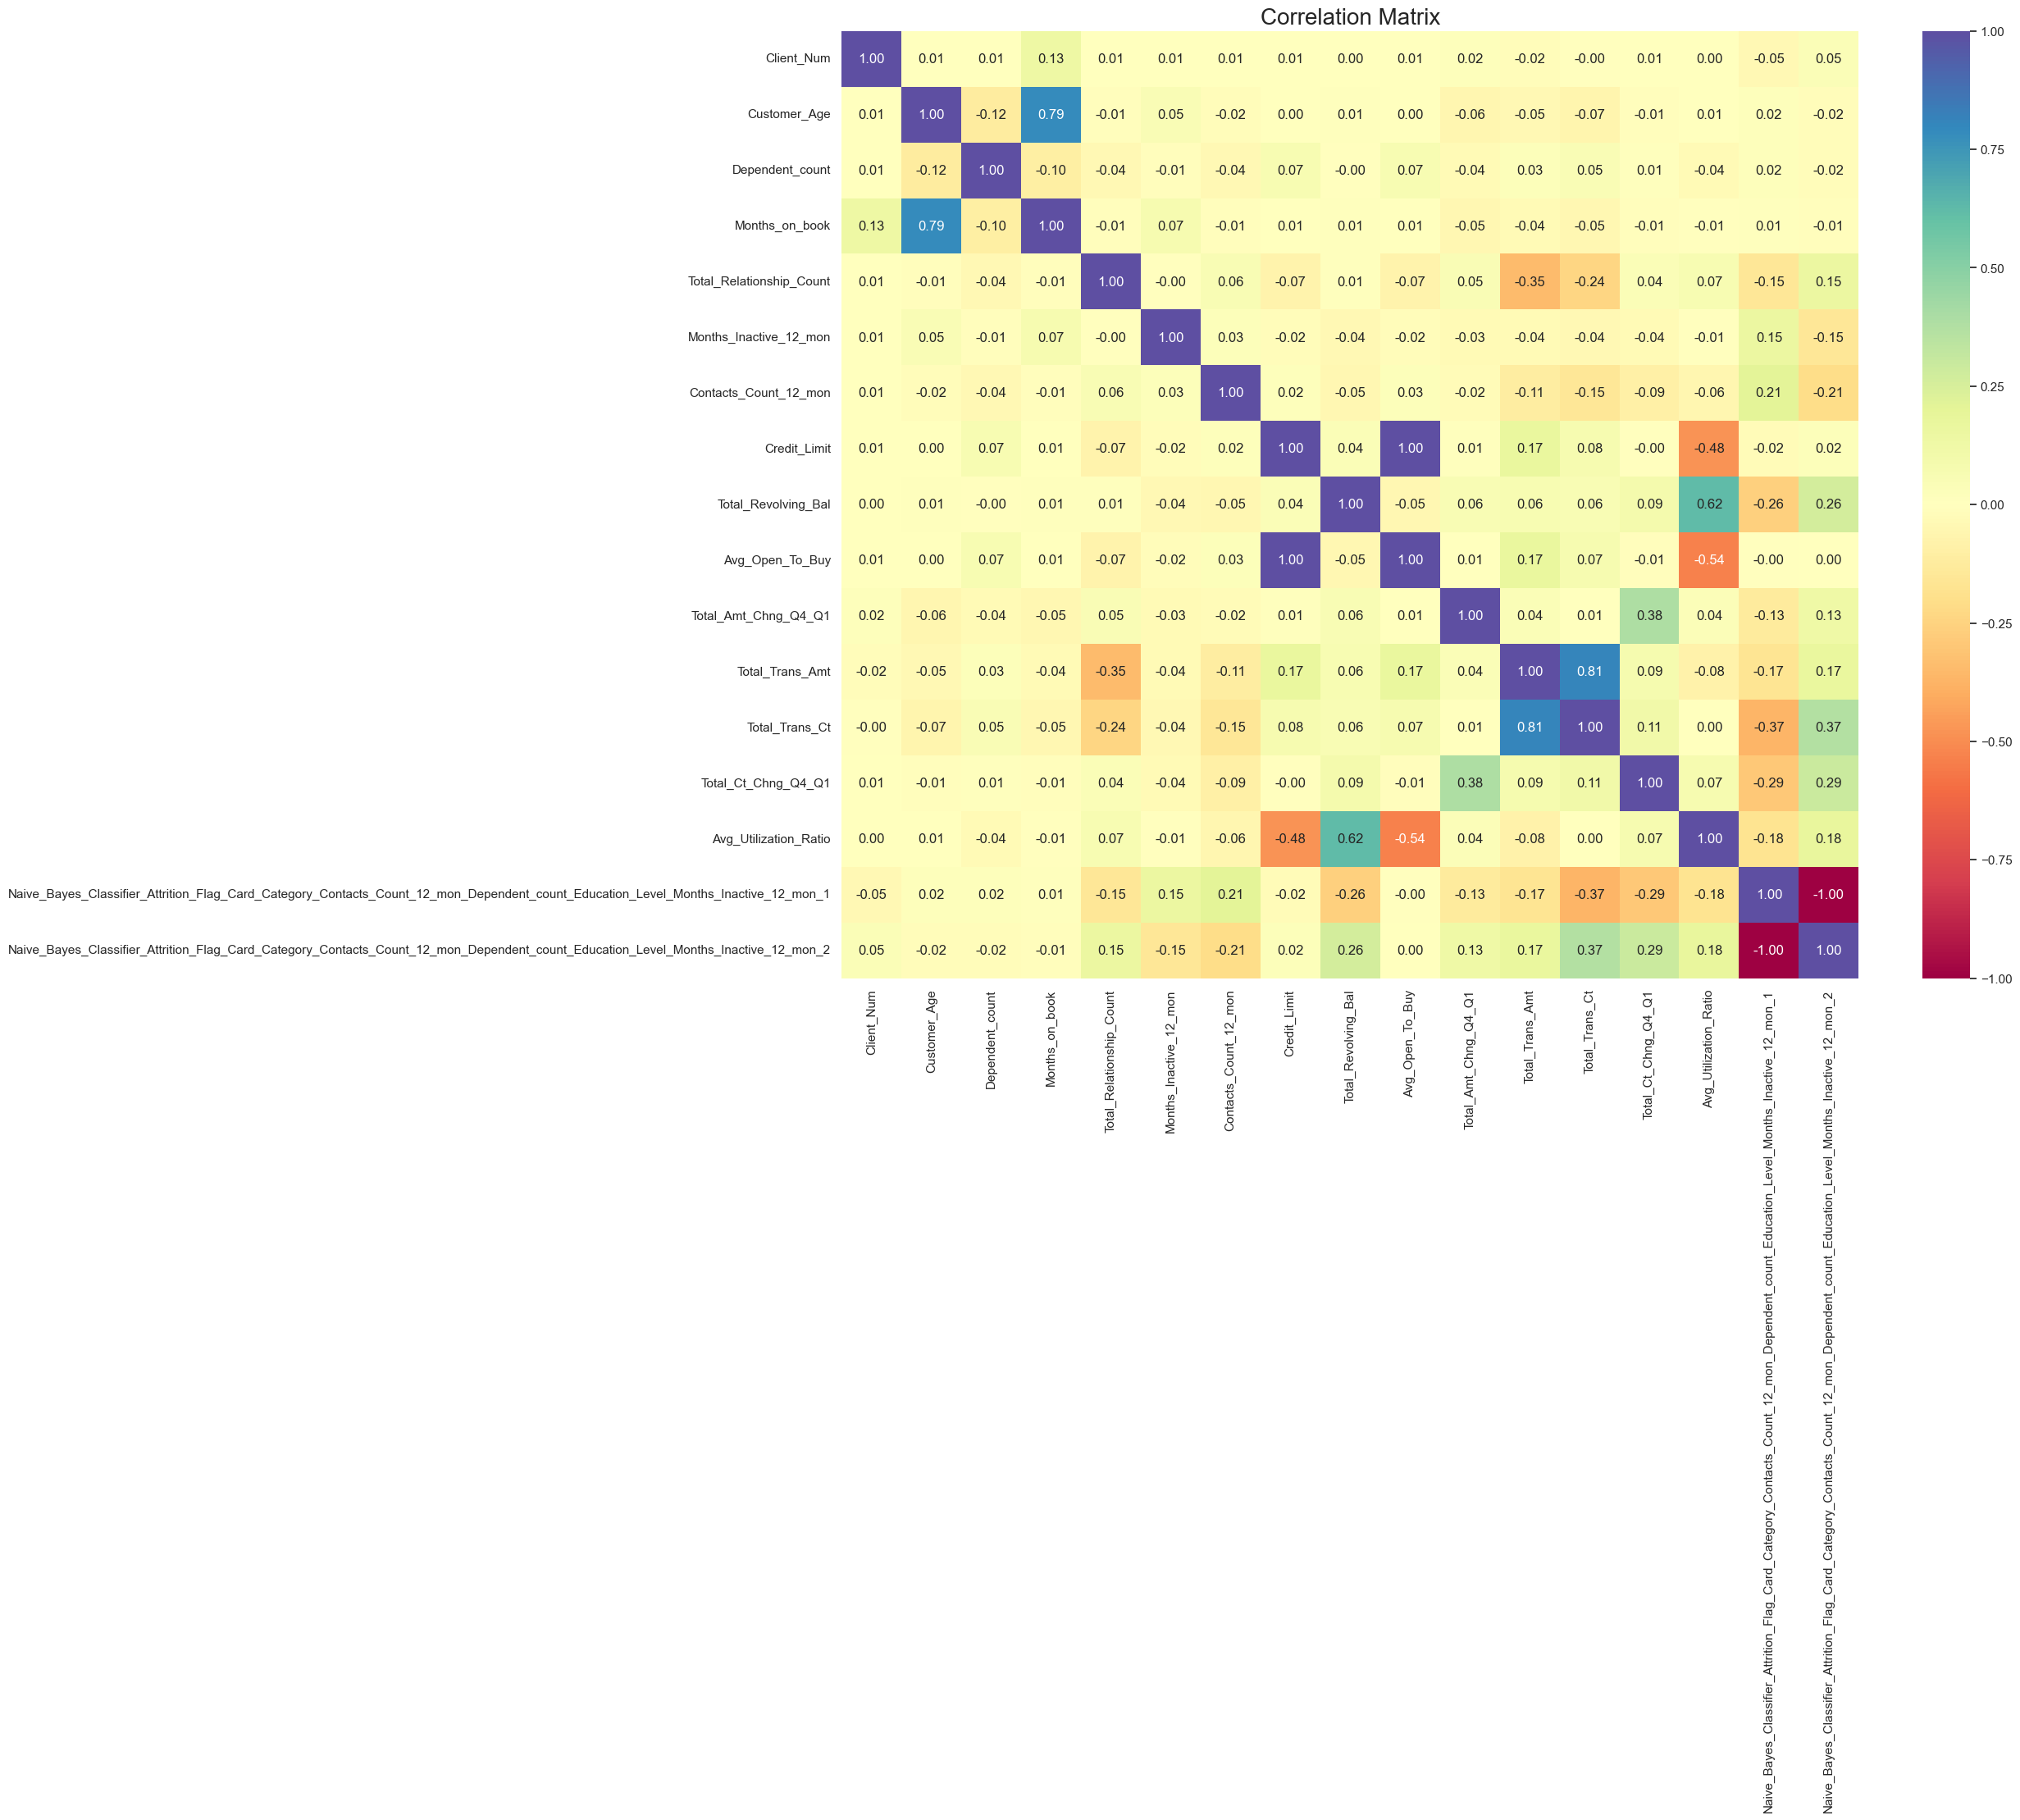

In [1015]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Spectral" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [1016]:
df.drop('Avg_Open_To_Buy', axis =1, inplace = True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis =1, inplace = True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis =1, inplace = True)
df.drop('Client_Num', axis =1, inplace = True)


In [1017]:
cleanup_nums = {"Gender":     {"M": 0, "F": 1},
                "Marital_Status": {"Single": 0, "Married": 1, "Unknown": 2, "Divorced": 3},
                "Attrition_Flag": {"Existing Customer":0 , "Attrited Customer": 1}}

df.replace(cleanup_nums, inplace=True)

In [1018]:
df.head(7)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       0                3     High School   
1               0            49       1                5        Graduate   
2               0            51       0                3        Graduate   
3               0            40       1                4     High School   
4               0            40       0                3      Uneducated   
5               0            44       0                2        Graduate   
6               0            51       0                4         Unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0               1     $60K - $80K          Blue              39   
1               0  Less than $40K          Blue              44   
2               1    $80K - $120K          Blue              36   
3               2  Less than $40K          Blue              34   
4               1     $60K - $80K          Blue              21   
5               1     $40K - $60K          Blue              36   
6               1         $120K +          Gold              46   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0       12691.0                  777                 1.335             1144   
1        8256.0                  864                 1.541             1291   
2        3418.0                    0                 2.594             1887   
3        3313.0                 2517                 1.405             1171   
4        4716.0                    0                 2.175              816   
5        4010.0                 1247                 1.376             1088   
6       34516.0                 2264                 1.975             1330   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0              42                1.625                  0.061  
1              33                3.714                  0.105  
2              20                2.333                  0.000  
3              20                2.333                  0.760  
4              28                2.500                  0.000  
5              24                0.846                  0.311  
6              31                0.722                  0.066

In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_


### <p style="background-color:#BA55D3; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Removing Outliers</p>

In [1020]:
df.shape

(10127, 19)

In [1021]:
df.sample(7)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
596                1            55       0                3      Uneducated   
2574               0            34       0                2      Uneducated   
2659               0            57       1                1     High School   
3095               0            34       1                2     High School   
4936               0            53       1                1      Uneducated   
1745               0            65       1                0        Graduate   
8130               0            44       1                2     High School   

      Marital_Status Income_Category Card_Category  Months_on_book  \
596                1     $60K - $80K          Blue              44   
2574               0         $120K +          Blue              17   
2659               1  Less than $40K          Blue              36   
3095               0  Less than $40K          Blue              24   
4936               0  Less than $40K          Blue              43   
1745               0  Less than $40K          Blue              56   
8130               1     $40K - $60K          Blue              28   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
596                          3                       2                      2   
2574                         3                       1                      2   
2659                         6                       2                      2   
3095                         4                       1                      0   
4936                         6                       2                      3   
1745                         6                       3                      2   
8130                         2                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
596         2323.0                    0                 0.737   
2574        5030.0                 2326                 0.856   
2659        3101.0                 1257                 0.416   
3095        2799.0                    0                 0.696   
4936        2126.0                 1257                 0.632   
1745        7478.0                    0                 0.847   
8130        1438.3                    0                 0.926   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
596               804              15                0.500   
2574             3345              69                1.300   
2659             1681              32                0.524   
3095             2311              43                0.654   
4936             4340              70                0.892   
1745             2213              62                0.771   
8130             4445              78                0.773   

      Avg_Utilization_Ratio  
596                   0.000  
2574                  0.462  
2659                  0.405  
3095                  0.000  
4936                  0.591  
1745                  0.000  
8130                  0.000

#### Outlier_Total_Amt_Chng_Q4_Q1

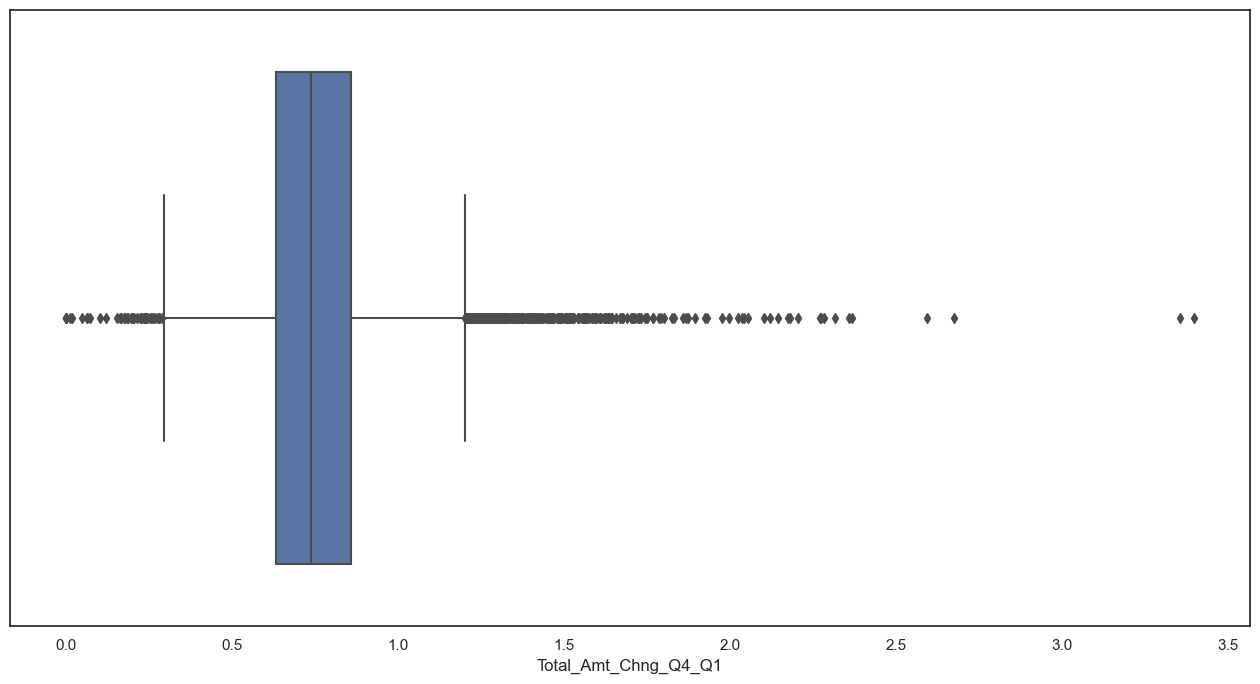

In [1022]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="Total_Amt_Chng_Q4_Q1", data=df) 
plt.show()

In [1023]:
Outlier_Total_Amt_Chng_Q4_Q1 = df[df.Total_Amt_Chng_Q4_Q1 >= 2.5].index
df.drop(Outlier_Total_Amt_Chng_Q4_Q1, inplace = True)

In [1024]:
df.shape

(10123, 19)

We deleted 4 data as an outlier 

#### Total_Trans_Amt	

In [1025]:
df.shape

(10123, 19)

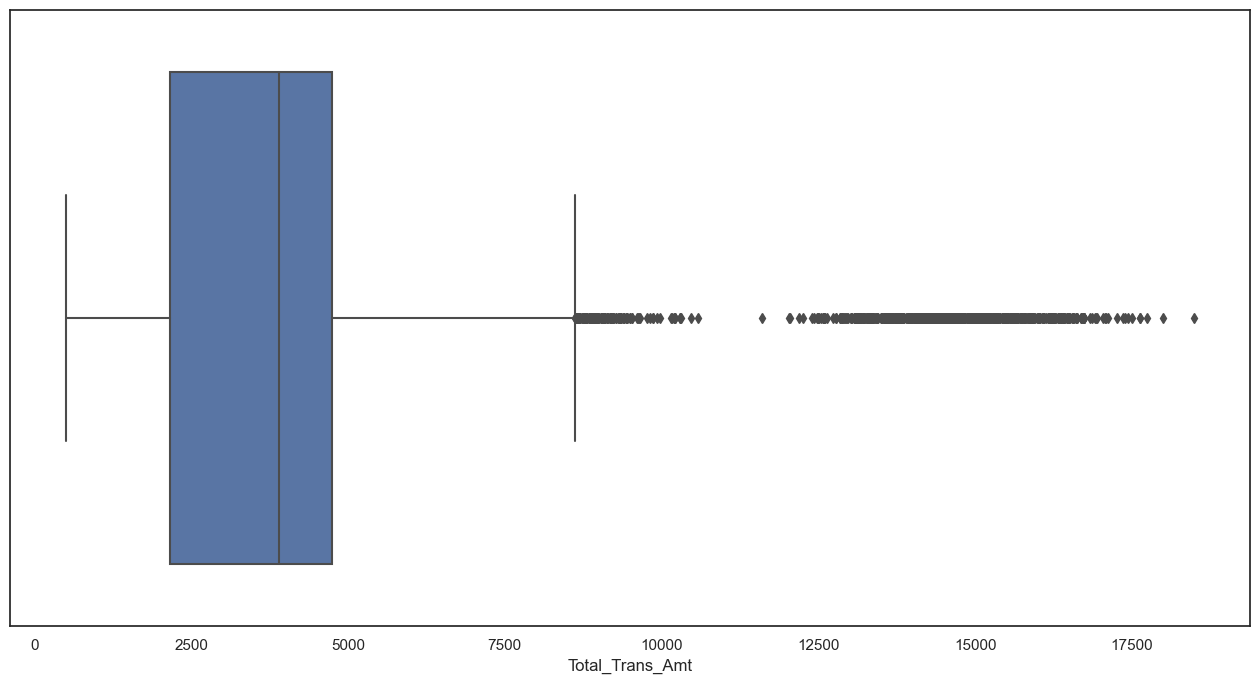

In [1026]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="Total_Trans_Amt", data=df) 
plt.show()

In [1027]:
df.Total_Trans_Amt.max()

18484

In [1028]:
Outlier_Total_Trans_Amt = df[df.Total_Trans_Amt >= 17800 ].index
df.drop(Outlier_Total_Trans_Amt, inplace = True)

In [1029]:
df.shape

(10121, 19)

We deleted 2 datas as an outlier 

#### Total_Trans_Ct	


In [1030]:
df.shape

(10121, 19)

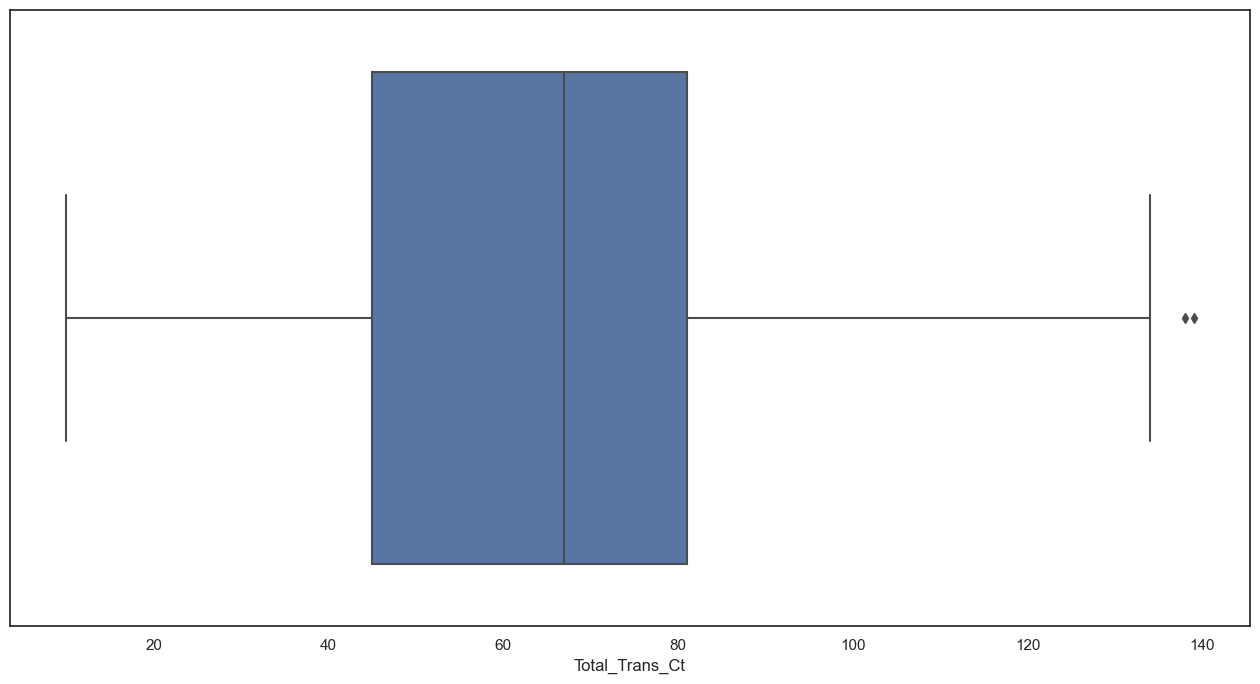

In [1031]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="Total_Trans_Ct", data=df) 
plt.show()

In [1032]:
Outlier_Total_Trans_Ct = df[df.Total_Trans_Ct >= 135 ].index
df.drop(Outlier_Total_Trans_Ct, inplace = True)

In [1033]:
df.shape

(10119, 19)

We deleted 2 datas as an outlier 

#### Total_Ct_Chng_Q4_Q1	


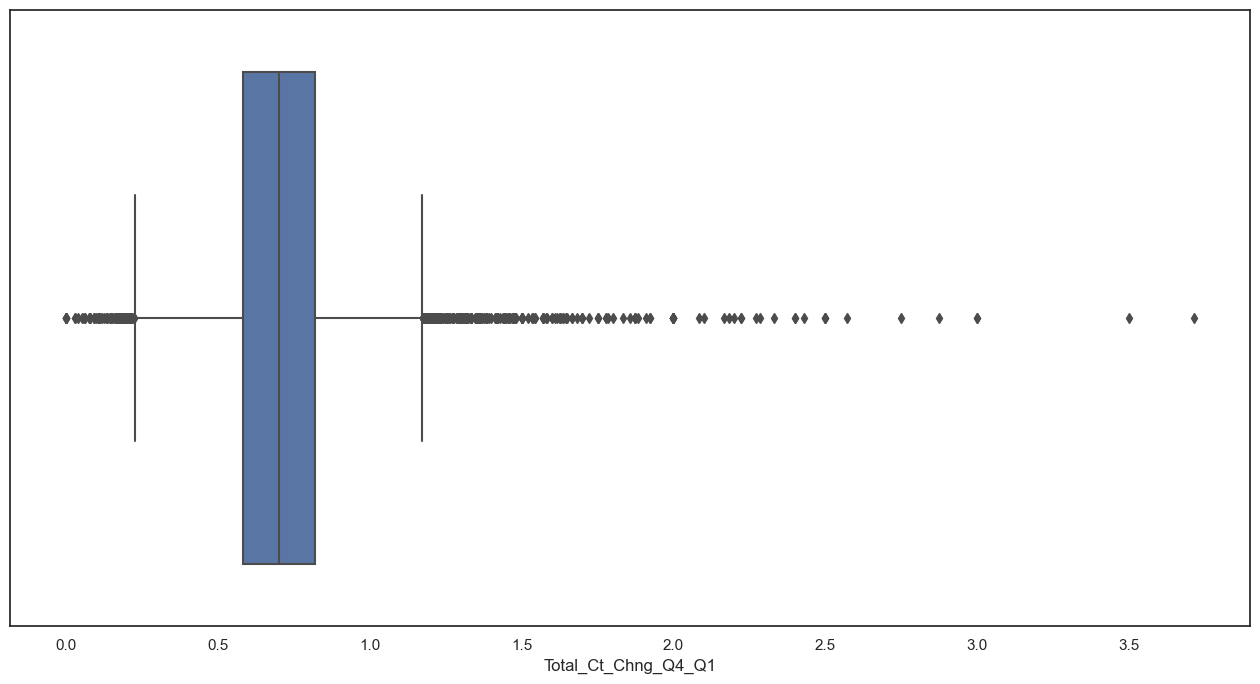

In [1034]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="Total_Ct_Chng_Q4_Q1", data=df) 
plt.show()

In [1035]:
Outlier_Total_Ct_Chng_Q4_Q1 = df[df.Total_Ct_Chng_Q4_Q1 >= 3.3].index
df.drop(Outlier_Total_Ct_Chng_Q4_Q1, inplace = True)

In [1036]:
df.shape

(10117, 19)

We deleted 2 dats as an outlier 


### <p style="background-color:#BA55D3; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Get Dummies </p>

In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10117 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10117 non-null  int64  
 1   Customer_Age              10117 non-null  int64  
 2   Gender                    10117 non-null  int64  
 3   Dependent_count           10117 non-null  int64  
 4   Education_Level           10117 non-null  object 
 5   Marital_Status            10117 non-null  int64  
 6   Income_Category           10117 non-null  object 
 7   Card_Category             10117 non-null  object 
 8   Months_on_book            10117 non-null  int64  
 9   Total_Relationship_Count  10117 non-null  int64  
 10  Months_Inactive_12_mon    10117 non-null  int64  
 11  Contacts_Count_12_mon     10117 non-null  int64  
 12  Credit_Limit              10117 non-null  float64
 13  Total_Revolving_Bal       10117 non-null  int64  
 14  Total_

In [1038]:
df3 = df.copy()

In [1039]:
df = pd.get_dummies(df)

In [1040]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10117 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10117 non-null  int64  
 1   Customer_Age                    10117 non-null  int64  
 2   Gender                          10117 non-null  int64  
 3   Dependent_count                 10117 non-null  int64  
 4   Marital_Status                  10117 non-null  int64  
 5   Months_on_book                  10117 non-null  int64  
 6   Total_Relationship_Count        10117 non-null  int64  
 7   Months_Inactive_12_mon          10117 non-null  int64  
 8   Contacts_Count_12_mon           10117 non-null  int64  
 9   Credit_Limit                    10117 non-null  float64
 10  Total_Revolving_Bal             10117 non-null  int64  
 11  Total_Amt_Chng_Q4_Q1            10117 non-null  float64
 12  Total_Trans_Amt                 

In [1041]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Marital_Status', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [1042]:
df.head(15)

Attrition_Flag  Customer_Age  Gender  Dependent_count  Marital_Status  \
0                0            45       0                3               1   
3                0            40       1                4               2   
4                0            40       0                3               1   
5                0            44       0                2               1   
6                0            51       0                4               1   
7                0            32       0                0               2   
9                0            48       0                2               0   
10               0            42       0                5               2   
11               0            65       0                1               1   
13               0            35       0                3               2   
14               0            57       1                2               1   
15               0            44       0                4               2   
16               0            48       0                4               0   
17               0            41       0                3               1   
18               0            61       0                1               1   

    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0               39                         5                       1   
3               34                         3                       4   
4               21                         5                       1   
5               36                         3                       1   
6               46                         6                       1   
7               27                         2                       2   
9               36                         6                       3   
10              31                         5                       3   
11              54                         6                       2   
13              30                         5                       1   
14              48                         5                       2   
15              37                         5                       1   
16              36                         6                       2   
17              34                         4                       4   
18              56                         2                       2   

    Contacts_Count_12_mon  Credit_Limit  ...  Income_Category_$120K +  \
0                       3       12691.0  ...                        0   
3                       1        3313.0  ...                        0   
4                       0        4716.0  ...                        0   
5                       2        4010.0  ...                        0   
6                       3       34516.0  ...                        1   
7                       2       29081.0  ...                        0   
9                       3       11656.0  ...                        0   
10                      2        6748.0  ...                        1   
11                      3        9095.0  ...                        0   
13                      3        8547.0  ...                        0   
14                      2        2436.0  ...                        0   
15                      2        4234.0  ...                        0   
16                      3       30367.0  ...                        0   
17                      1       13535.0  ...                        0   
18                      3        3193.0  ...                        0   

    Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                             0                            1   
3                             0                            0   
4                             0                            1   
5                             1                            0   
6                             0                            0   
7                             0                            1   
9